## QUESTION 1

In [2]:
import pandas as pd

# Defining the data string in the required format
data_string = """
Payment	Transaction Code	Product
PayPal	64554692	Book
Credit	76030991	DVD
PayPal	85149545	Book
PayPal	36672662	Book
Credit	69538969	Book
Credit	70150376	Book
PayPal	32678208	Book
PayPal	38816415	Book
PayPal	28412841	DVD
Credit	61339318	Book
Credit	23720265	DVD
Credit	49253163	DVD
Credit	36030772	DVD
Credit	97341431	Book
PayPal	38912997	Book
PayPal	43991652	Book
Credit	31201556	Book
Credit	91338073	DVD
Credit	53630040	Book
PayPal	48250863	DVD
PayPal	47050079	DVD
PayPal	87769595	Book
Credit	55153310	Book
PayPal	31717231	DVD
Credit	94095616	DVD
"""

# Convert the data string to a DataFrame
from io import StringIO

# Use StringIO to read the data into a pandas DataFrame
data_io = StringIO(data_string)
df_updated = pd.read_csv(data_io, sep="\t")

# Calculate the proportions as before
total_customers = len(df_updated)
paypal_proportion = len(df_updated[df_updated['Payment'] == 'PayPal']) / total_customers
credit_proportion = len(df_updated[df_updated['Payment'] == 'Credit']) / total_customers
book_proportion = len(df_updated[df_updated['Product'] == 'Book']) / total_customers
dvd_proportion = len(df_updated[df_updated['Product'] == 'DVD']) / total_customers

(paypal_proportion, credit_proportion, book_proportion, dvd_proportion)


(0.48, 0.52, 0.6, 0.4)

## QUESTION 2

In [6]:
import pandas as pd

# Defining the data string in the required format
data_string = """
Gender	Type	Purchased	Vehicle Age	Mileage	MPG
Male	Midsize	Used	15	128079	28.5
Female	Midsize	New	1	23626	44.3
Male	Small	New	7	77104	22.1
Female	Large SUV	Used	14	184880	16.6
Female	Small	New	3	25137	35.9
Female	Minivan	New	10	180369	18.9
Male	Small	Used	7	71576	46.5
Male	Small	New	11	164642	42.4
Male	Small	Used	13	204929	32.1
Female	Small	New	7	143116	32.9
Male	Minivan	Used	13	183354	10.3
Male	Small SUV	Used	13	139532	18.8
Female	Small	New	2	22662	26.5
Female	Midsize	New	0.25	2907	26.7
Female	Large SUV	New	7	131400	19.1
Female	Small	Used	11	104889	33.3
Female	Small	New	5	48558	32.4
Male	Midsize	New	0.5	7482	40.3
Female	Small	Used	10	137796	28.0
Female	Small SUV	New	4	30197	25.7
Male	Small SUV	Used	14	85070	21.5
Female	Small	Used	13	134110	32.6
Male	Midsize	Used	12	86197	25.9
"""

# Convert the data string to a DataFrame
from io import StringIO

# Use StringIO to read the data into a pandas DataFrame
data_io = StringIO(data_string)
df_vehicle = pd.read_csv(data_io, sep="\t")

# Calculate the correlation matrix for Vehicle Age, Mileage, and MPG
correlation_matrix = df_vehicle[['Vehicle Age', 'Mileage', 'MPG']].corr().round(3)

# Display the correlation matrix directly without using ace_tools
correlation_matrix



,Vehicle Age,Mileage,MPG
Vehicle Age,1.000,0.821,-0.412
Mileage,0.821,1.000,-0.395
MPG,-0.412,-0.395,1.000


### part b

There is a strong positive correlation between vehicle age and mileage and moderate negative correlations between MPG and vehicle age and MPG and mileage. Newer vehicles tend to have better gas mileage.

In [7]:
# Updating the code to use pandas.concat instead of append, as append has been deprecated

# Calculate the average vehicle age by type of car and whether it was purchased new or used.
# Group by 'Type' and 'Purchased' columns to get the average Vehicle Age.
average_vehicle_age = df_vehicle.groupby(['Type', 'Purchased'])['Vehicle Age'].mean().unstack().round(2)

# Calculate the grand total average for each type and overall
average_vehicle_age['Grand Total'] = df_vehicle.groupby('Type')['Vehicle Age'].mean().round(2)
grand_totals = pd.concat([df_vehicle.groupby('Purchased')['Vehicle Age'].mean().round(2), 
                          pd.Series(df_vehicle['Vehicle Age'].mean().round(2), index=['Grand Total'])])

# Add the grand total row
average_vehicle_age.loc['Grand Total'] = grand_totals

# Display the result
average_vehicle_age


Purchased,New,Used,Grand Total
Type,,,
Large SUV,7.00,14.00,10.50
Midsize,0.58,13.50,5.75
Minivan,10.00,13.00,11.50
Small,5.83,10.80,8.09
Small SUV,4.00,13.50,10.33
Grand Total,4.81,12.27,8.38


## part D


 Used cars are older than new cars in general. The average age of used cars is at least 10 years. SUVs and minivans tend to be older than other cars.

In [9]:
# Calculate the average MPG by type of car and whether it was purchased new or used.
# Group by 'Type' and 'Purchased' columns to get the average MPG.

average_mpg = df_vehicle.groupby(['Type', 'Purchased'])['MPG'].mean().unstack().round(2)

# Calculate the grand total average for each type and overall
average_mpg['Grand Total'] = df_vehicle.groupby('Type')['MPG'].mean().round(2)
grand_totals_mpg = pd.concat([df_vehicle.groupby('Purchased')['MPG'].mean().round(2), 
                              pd.Series(df_vehicle['MPG'].mean().round(2), index=['Grand Total'])])

# Add the grand total row
average_mpg.loc['Grand Total'] = grand_totals_mpg

# Display the result
average_mpg


Purchased,New,Used,Grand Total
Type,,,
Large SUV,19.10,16.60,17.85
Midsize,37.10,27.20,33.14
Minivan,18.90,10.30,14.60
Small,32.03,34.50,33.15
Small SUV,25.70,20.15,22.00
Grand Total,30.60,26.74,28.75


### Part E

Small and mid-size cars get the best gas mileage, while large SUVs and minivans get the worst. Used cars have slightly worse mileage than new cars.

### Question 4



| **Variables**        | **Classification** | **Reasoning**                                                                            |
|----------------------|--------------------|------------------------------------------------------------------------------------------|
| Cust ID              |  Categorical     |  Uses categories with specified characteristics                                      |
| Region               |  Categorical     |  Uses categories with specified characteristics                                      |
| Payment              |  Categorical     |  Uses categories with specified characteristics                                      |
| Transaction Code     |  Ordinal     |  Can be ordered or ranked according to some relationship characteristics                                      |
| Source               |  Categorical     |  Uses categories with specified characteristics                                      |
| Amount               |  Ratio           |  Are continuous and have a natural zero point                                        |
| Product              |  Categorical     |  Uses categories with specified characteristics                                      |
| Time of Day          |  Interval        |  Can be ordered or ranked with constant differences between observations and an arbitrary zero point |



# Question 5

     Age  Frequency  Relative Frequency  Cumulative Relative Frequency
0  18-27         50               0.333                          0.333
1  28-37         55               0.367                          0.700
2  38-47         21               0.140                          0.840
3  48-57         14               0.093                          0.933
4  58-67          8               0.053                          0.987
5  68-77          2               0.013                          1.000


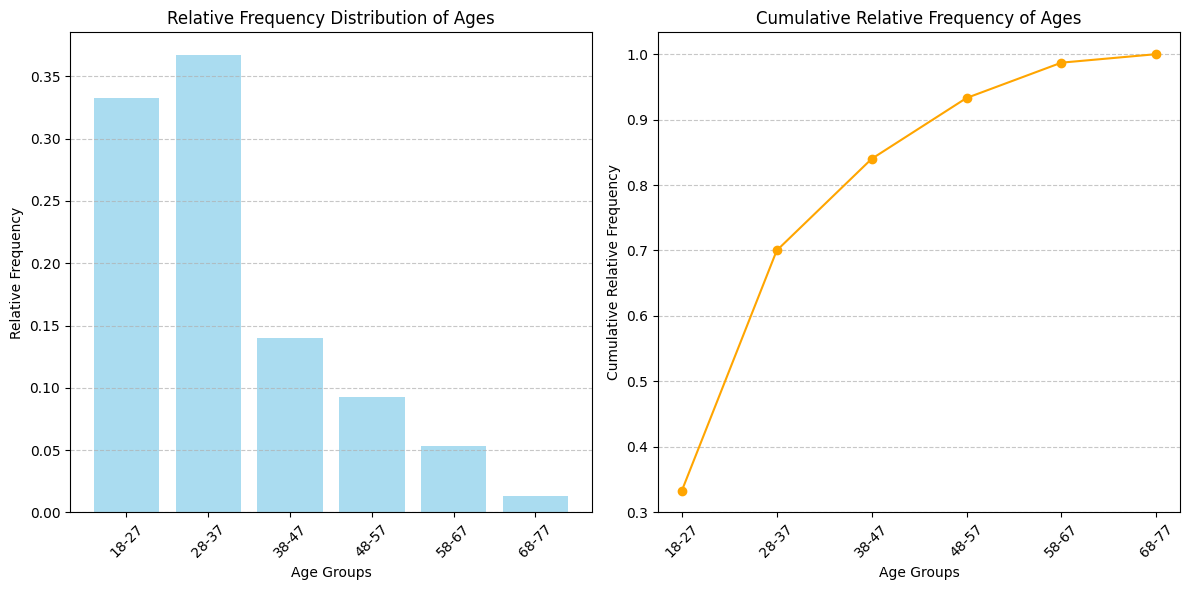

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data string
data_string = """
Age
20
22
24
41
32
23
41
52
65
26
33
56
24
20
35
34
38
34
37
31
67
26
24
21
46
22
20
60
25
21
22
29
56
32
30
27
37
39
26
32
31
35
31
64
27
31
32
73
30
42
45
27
22
26
33
27
24
21
28
51
73
51
21
27
40
34
34
63
33
28
24
18
63
37
38
22
31
31
42
24
65
22
22
51
23
30
32
21
52
22
41
53
54
37
27
25
34
29
27
32
29
32
28
25
51
44
33
22
35
30
27
23
19
44
41
35
25
28
34
31
32
41
22
28
21
41
36
26
37
35
34
43
30
31
43
24
26
45
26
48
43
59
55
29
32
53
33
56
33
46
"""

# Cleaning and processing the data string
data_string = data_string.replace("Age", "").strip().replace("\n", ",").replace(",,", "")
ages = list(map(int, data_string.split(',')))

if(1):
    # # Define age bins and labels
    age_bins = [18, 28, 38, 48, 58, 68, 78]  # Adjusted bins to reflect correct ranges
    age_labels = ['18-27', '28-37', '38-47', '48-57', '58-67', '68-77']

    # # Define age bins and labels
    # age_bins = [18, 30, 39, 49, 59, 69, 79]  # Adjusted bins to reflect correct ranges
    # age_labels = ['19-28', '29-38', '39-48', '49-58', '59-68', '69-78']

else:
     # Define age bins and labels
    # age_bins = [20, 29, 39, 49, 59, 69, 79]  # Adjusted bins to reflect correct ranges
    # age_labels = ['20-29', '29-39', '39-49', '49-59', '59-69', '69-79']
    
     # Define age bins and labels
    age_bins = [18, 28, 45, 64, 80]  # Adjusted bins to reflect the age ranges given
    age_labels = ['18-29', '30-45', '46-64', '65-80']

    # Frequency data corresponding to the age ranges
age_frequency = [250, 750, 590, 400]


# Create a DataFrame
age_series = pd.Series(ages)

# Create frequency distribution using pd.cut
frequency_distribution = pd.cut(age_series, bins=age_bins, labels=age_labels, right=False).value_counts().sort_index()

# Calculate Frequency, Relative Frequency, and Cumulative Relative Frequency
frequency = frequency_distribution.values
total_count = sum(frequency)  # Total number of observations
relative_frequency = frequency / total_count  # Calculate relative frequency
cumulative_relative_frequency = np.cumsum(relative_frequency)  # Cumulative relative frequency

# Create a DataFrame for output
frequency_df = pd.DataFrame({
    'Age': age_labels,
    'Frequency': frequency,
    'Relative Frequency': relative_frequency.round(3),
    'Cumulative Relative Frequency': cumulative_relative_frequency.round(3)
})

# Display the DataFrame
print(frequency_df)

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for Relative Frequency
plt.subplot(1, 2, 1)
plt.bar(frequency_df['Age'], frequency_df['Relative Frequency'], color='skyblue', alpha=0.7)
plt.title('Relative Frequency Distribution of Ages')
plt.xlabel('Age Groups')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Line chart for Cumulative Relative Frequency
plt.subplot(1, 2, 2)
plt.plot(frequency_df['Age'], frequency_df['Cumulative Relative Frequency'], marker='o', color='orange', linestyle='-')
plt.title('Cumulative Relative Frequency of Ages')
plt.xlabel('Age Groups')
plt.ylabel('Cumulative Relative Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## QUESTION 6

In [ ]:
import pandas as pd

# Data provided
data_string = """
Marital Status	Income	Long-Term Debt	Retirement Savings
Marital Status	Income	Long-Term Debt	Retirement Savings
Single	$117,700	$0	$31,400
Single	$25,300	$20,600	$2,700
Single	$41,800	$0	$25,000
Single	$138,400	$36,700	$98,100
Single	$56,800	$0	$4,800
Single	$48,400	$11,500	$18,200
Married	$117,100	$41,100	$75,700
Single	$100,800	$0	$55,500
Single	$68,100	$7,800	$26,800
Single	$58,400	$0	$31,600
Single	$38,800	$16,700	$17,600
Single	$43,400	$12,100	$11,400
Married	$52,600	$24,900	$31,600
Single	$120,900	$83,200	$22,900
Married	$84,200	$0	$168,600
Married	$52,000	$0	$13,500
Single	$62,500	$40,100	$38,800
Single	$37,200	$11,100	$19,300
Married	$105,800	$73,100	$6,400
Married	$33,300	$45,600	$4,700
Married	$62,700	$0	$29,100
Single	$189,500	$102,000	$16,000
Single	$84,300	$0	$46,900
Married	$128,800	$0	$66,100
"""

data_string = data_string.replace("$","").replace(",","").replace("\t",",")

# Creating a dataframe from the data string
from io import StringIO

data = pd.read_csv(StringIO(data_string))

# Create a PivotTable (group by 'Marital Status') and calculate the mean and standard deviation
mean_values = data.groupby('Marital Status').mean()
std_values = data.groupby('Marital Status').std()

# Calculate the grand total (mean and std for all entries regardless of marital status)
grand_total_mean = data[['Income', 'Long-Term Debt', 'Retirement Savings']].mean()
grand_total_std = data[['Income', 'Long-Term Debt', 'Retirement Savings']].std()

# Combine results into a final output
result_mean = pd.concat([mean_values, pd.DataFrame(grand_total_mean).T.rename(index={0: 'Grand Total'})])
result_std = pd.concat([std_values, pd.DataFrame(grand_total_std).T.rename(index={0: 'Grand Total'})])

# Displaying the result without ace_tools, using print for clarity

# Show the mean and standard deviation dataframes
print("Mean Values for Income, Long-Term Debt, and Retirement Savings:")
print(result_mean)
print("\nStandard Deviation Values for Income, Long-Term Debt, and Retirement Savings:")
print(result_std)

Mean Values for Income, Long-Term Debt, and Retirement Savings:
                   Income  Long-Term Debt  Retirement Savings
Married      79562.500000         23087.5        49462.500000
Single       77018.750000         21362.5        29187.500000
Grand Total  77866.666667         21937.5        35945.833333

Standard Deviation Values for Income, Long-Term Debt, and Retirement Savings:
                   Income  Long-Term Debt  Retirement Savings
Married      34753.291211    27948.750930        54829.630610
Single       45148.070741    30708.736542        23180.879333
Grand Total  41212.215018    29213.752159        36888.032455


In [4]:
import pandas as pd
from datetime import datetime

# Define the data
data = {
    'Arrival Date': ['12/5/2014', '12/1/2014', '12/4/2014', '12/1/2014', '12/9/2014', '12/5/2014', '12/19/2014', '12/24/2014',
                     '12/2/2014', '12/10/2014', '12/3/2014', '12/10/2014', '12/10/2014', '12/14/2014', '12/24/2014', '12/5/2014',
                     '12/3/2014', '12/20/2014', '12/1/2014', '12/20/2014'],
    'Departure Date': ['12/7/2014', '12/9/2014', '12/12/2014', '12/3/2014', '12/13/2014', '12/8/2014', '12/21/2014', '12/31/2014',
                        '12/4/2014', '12/14/2014', '12/6/2014', '12/15/2014', '12/14/2014', '12/17/2014', '12/31/2014', '12/7/2014',
                        '12/6/2014', '12/30/2014', '12/3/2014', '12/23/2014'],
    'No of Guests': [3, 3, 2, 4, 2, 2, 1, 5, 1, 1, 1, 1, 2, 2, 6, 1, 2, 3, 2, 2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert Arrival Date and Departure Date to datetime format
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], format='%m/%d/%Y')
df['Departure Date'] = pd.to_datetime(df['Departure Date'], format='%m/%d/%Y')

# Calculate Length of Stay in days
df['Length of Stay'] = (df['Departure Date'] - df['Arrival Date']).dt.days

# Calculate the mean length of stay
mean_length_of_stay = df['Length of Stay'].mean()

# Calculate the mean number of guests per party
mean_guests = df['No of Guests'].mean()

# Calculate the correlation between party size and length of stay
correlation = df['Length of Stay'].corr(df['No of Guests'])

# Print results
print(f"Mean Length of Stay: {mean_length_of_stay:.1f} days")
print(f"Mean Number of Guests: {mean_guests:.1f}")
print(f"Correlation between Party Size and Length of Stay: {correlation:.3f}")


Mean Length of Stay: 4.2 days
Mean Number of Guests: 2.3
Correlation between Party Size and Length of Stay: 0.461


In [5]:
import pandas as pd
from scipy.stats import pearsonr

# Prepare the dataset
data = {
    'Age': [52, 46, 45, 48, 31, 41, 49, 40, 33, 42, 25, 29, 39, 49, 41, 45, 31, 50, 61, 32, 31],
    'No. of TVs in Home': [4, 3, 3, 4, 2, 4, 2, 4, 3, 1, 4, 3, 3, 3, 4, 4, 2, 5, 4, 2, 3],
    'Hrs of TV viewing per week': [6, 40, 16, 15, 10, 15, 12, 16, 36, 21, 5, 12, 5, 15, 20, 10, 16, 20, 10, 15, 11]
}

df = pd.DataFrame(data)

# Calculate the correlation between the number of TVs and hours of TV viewing
corr_tv, p_value_tv = pearsonr(df['No. of TVs in Home'], df['Hrs of TV viewing per week'])
print(f"Correlation between number of TVs and hours of TV viewing: {corr_tv:.4f}, p-value: {p_value_tv:.4f}")

# Calculate the correlation between age and hours of TV viewing
corr_age, p_value_age = pearsonr(df['Age'], df['Hrs of TV viewing per week'])
print(f"Correlation between age and hours of TV viewing: {corr_age:.4f}, p-value: {p_value_age:.4f}")


Correlation between number of TVs and hours of TV viewing: -0.1168, p-value: 0.6142
Correlation between age and hours of TV viewing: 0.0400, p-value: 0.8632


In [3]:
# Rerun the grouped mean and sample standard deviation computation without external libraries.
import math

data_str = """Age\tFrequency
18 to 29	300
30 to 45	760
46 to 64	520
65 to 80	350
"""

# Parse
lines = [ln.strip() for ln in data_str.strip().splitlines() if ln.strip()]
rows = []
for ln in lines[1:]:
    parts = ln.split("\t")
    age_range = parts[0].strip()
    freq = int(parts[1].strip())
    a,b = [int(x) for x in age_range.split("to")]
    midpoint = (a + b) / 2.0
    rows.append({'age_range': age_range, 'freq': freq, 'midpoint': midpoint})

# Compute f*x and sums
for r in rows:
    r['f_x'] = r['freq'] * r['midpoint']

N = sum(r['freq'] for r in rows)
sum_fx = sum(r['f_x'] for r in rows)
mean = sum_fx / N

# Compute squared deviations
for r in rows:
    diff = r['midpoint'] - mean
    r['sq'] = diff**2
    r['f_sq'] = r['freq'] * r['sq']

sum_f_sq = sum(r['f_sq'] for r in rows)
s = math.sqrt(sum_f_sq / (N - 1))

# Print results rounded to 2 decimals
print("Part 1: Midpoints and f_i * x_i:")
for r in rows:
    print(f"{r['age_range']}: Frequency={r['freq']}, Midpoint={r['midpoint']:.2f}, f_i*x_i={r['f_x']:.2f}")

print("\nPart 2: Sum and mean:")
print(f"Σ f_i * x_i = {sum_fx:.2f}")
print(f"Total frequency N = {N}")
print(f"Sample mean x̄ = {mean:.2f}")

print("\nPart 3: f_i*(x_i - x̄)^2:")
for r in rows:
    print(f"{r['age_range']}: f_i*(x_i - x̄)^2 = {r['f_sq']:.2f}")

print("\nPart 4: Sum and standard deviation:")
print(f"Σ f_i*(x_i - x̄)^2 = {sum_f_sq:.2f}")
print(f"Sample standard deviation s = {s:.2f}")


Part 1: Midpoints and f_i * x_i:
18 to 29: Frequency=300, Midpoint=23.50, f_i*x_i=7050.00
30 to 45: Frequency=760, Midpoint=37.50, f_i*x_i=28500.00
46 to 64: Frequency=520, Midpoint=55.00, f_i*x_i=28600.00
65 to 80: Frequency=350, Midpoint=72.50, f_i*x_i=25375.00

Part 2: Sum and mean:
Σ f_i * x_i = 89525.00
Total frequency N = 1930
Sample mean x̄ = 46.39

Part 3: f_i*(x_i - x̄)^2:
18 to 29: f_i*(x_i - x̄)^2 = 157130.84
30 to 45: f_i*(x_i - x̄)^2 = 60010.50
46 to 64: f_i*(x_i - x̄)^2 = 38584.43
65 to 80: f_i*(x_i - x̄)^2 = 238679.16

Part 4: Sum and standard deviation:
Σ f_i*(x_i - x̄)^2 = 494404.92
Sample standard deviation s = 16.01


In [5]:
# Re-run the computation without relying on any persistent state.
import math

data_str = """House Age\tSquare Feet\tMarket Value
33\t1850\t96,000
32\t1692\t87,500
28\t1484\t82,600
27\t1581\t120,700
32\t1842\t93,300
27\t1520\t100,700
28\t1588\t81,000
32\t2123\t116,100
27\t1484\t81,300
27\t1484\t79,800
33\t1666\t88,400
32\t1620\t96,700
32\t1732\t87,600
28\t1520\t88,100
28\t1784\t91,300
32\t1852\t100,800
32\t1914\t104,400
27\t1684\t96,700
27\t1668\t90,900
"""

lines = [ln for ln in data_str.strip().splitlines() if ln.strip()]
ages = []
for ln in lines[1:]:
    parts = ln.split("\t")
    age = float(parts[0].strip())
    ages.append(age)

n = len(ages)
mean_formula = sum(ages) / n
sq_diffs = [(x - mean_formula)**2 for x in ages]
variance_formula = sum(sq_diffs) / (n - 1)  # sample variance
std_formula = math.sqrt(variance_formula)

# Print results
print("n =", n)
print("Mean (formula) = {:.2f}".format(mean_formula))
print("Mean (Excel AVERAGE) = {:.2f}".format(mean_formula))  # same
print("Variance (formula, sample) = {:.2f}".format(variance_formula))
print("Variance (Excel VAR.S) = {:.2f}".format(variance_formula))
print("Standard deviation (formula, sample) = {:.2f}".format(std_formula))
print("Standard deviation (Excel STDEV.S) = {:.2f}".format(std_formula))


n = 19
Mean (formula) = 29.68
Mean (Excel AVERAGE) = 29.68
Variance (formula, sample) = 6.34
Variance (Excel VAR.S) = 6.34
Standard deviation (formula, sample) = 2.52
Standard deviation (Excel STDEV.S) = 2.52
